In [ ]:
import pandas as pd
import glob
import os
import re


carpeta = "cvs/events"

archivos = glob.glob(os.path.join(carpeta, "*.csv"))

lista_dfs = []

for archivo in archivos:
    try:
        df = pd.read_csv(archivo, parse_dates=["Fecha del evento"], dayfirst=True)

        nombre_archivo = os.path.basename(archivo)
        match = re.search(r"(\d+)\.csv$", nombre_archivo)
        if match:
            id_vaca = match.group(1)
            df["ID_Vaca"] = id_vaca
        else:
            df["ID_Vaca"] = "Desconocido"

        # Asegurar que la fecha esté en datetime
        df["Fecha del evento"] = pd.to_datetime(df["Fecha del evento"], dayfirst=True, errors='coerce')

        lista_dfs.append(df)

    except Exception as e:
        print(f"Error al procesar {archivo}: {e}")

df_total = pd.concat(lista_dfs, ignore_index=True)

df_total = df_total.sort_values(by=["ID_Vaca", "Fecha del evento"]).reset_index(drop=True)

df_total.to_csv("todos_los_eventos.csv", index=False)

print(f"✅ Se combinaron {len(lista_dfs)} archivos.")
print(f"Total de eventos: {len(df_total)}")
print(df_total.head())

✅ Se combinaron 44 archivos.
Total de eventos: 3512
  Evento                 Tipo de evento Fecha del evento  \
0    NaN                        Entrada       2022-07-07   
1    NaN                           Peso       2022-09-27   
2    NaN       Diagnósticos/Tratamiento       2022-09-27   
3    NaN       Diagnósticos/Tratamiento       2023-08-17   
4    NaN  Invitación Visita Veterinaria       2023-08-17   

                                         Descripción                 Usuario  \
0                                         Nacimiento                   User1   
1                                              61 kg           DelproCliente   
2       Dns: VACUNA; Loc.: DD; Trat: ONE-SHOT; Med:            DelproCliente   
3  Dns: Presynch; Loc.: DD; Trat: PG X1; Med: LUT...           DelproCliente   
4  PG1 Becerras (edad en dias 400-407), Available...  DR  RAFA (Veterinario)   

    Comentario ID_Vaca  
0          NaN    1213  
1  ALTURA 88.7    1213  
2          NaN    1213  
3     

In [ ]:
df_total

,Evento,Tipo de evento,Fecha del evento,Descripción,Usuario,Comentario,ID_Vaca
0,NaN,Entrada,2022-07-07,Nacimiento,User1,NaN,1213
1,NaN,Peso,2022-09-27,61 kg,DelproCliente,ALTURA 88.7,1213
2,NaN,Diagnósticos/Tratamiento,2022-09-27,Dns: VACUNA; Loc.: DD; Trat: ONE-SHOT; Med:,DelproCliente,NaN,1213
3,NaN,Diagnósticos/Tratamiento,2023-08-17,Dns: Presynch; Loc.: DD; Trat: PG X1; Med: LUT...,DelproCliente,NaN,1213
4,NaN,Invitación Visita Veterinaria,2023-08-17,"PG1 Becerras (edad en dias 400-407), Available...",DR RAFA (Veterinario),NaN,1213
...,...,...,...,...,...,...,...
3507,NaN,Parto,2025-10-08,Normal; 7446,DelproCliente,ANGUS,8783
3508,NaN,Cambio de grupo,2025-10-10,"20, RETO -> 3, VMS 3",DelproCliente,NaN,8783
3509,NaN,Cambio tabla alimentación,2025-10-11,None -> primerizas-DEL,Admin,NaN,8783
3510,NaN,Condición corporal,2025-10-15,Condición corporal: 3.64 - DDUP: 7,Admin,BCS Camera,8783


In [ ]:
df_total_out = df_total.copy()
# Drop Column: `Evento`
df_total_out = df_total_out.drop(columns=['Evento'])
# Drop Column: `Usuario`
df_total_out = df_total_out.drop(columns=['Usuario'])
# Drop Column: `Comentario`
df_total_out = df_total_out.drop(columns=['Comentario'])
# Drop Column: `Descripción`
df_total_out = df_total_out.drop(columns=['Descripción'])
# Drop missing: `Tipo de evento`
df_total_out = df_total_out.dropna(subset=['Tipo de evento'])
df_total_out


,Tipo de evento,Fecha del evento,ID_Vaca
0,Entrada,2022-07-07,1213
1,Peso,2022-09-27,1213
2,Diagnósticos/Tratamiento,2022-09-27,1213
3,Diagnósticos/Tratamiento,2023-08-17,1213
4,Invitación Visita Veterinaria,2023-08-17,1213
...,...,...,...
3507,Parto,2025-10-08,8783
3508,Cambio de grupo,2025-10-10,8783
3509,Cambio tabla alimentación,2025-10-11,8783
3510,Condición corporal,2025-10-15,8783


In [ ]:
df = df_total_out.copy()
# Change Type: `Fecha del evento`
df['Fecha del evento'] = df['Fecha del evento'].astype("datetime64[ns]")
# One-hot Encoding: `Tipo de evento`
df = pd.get_dummies(df, columns=['Tipo de evento'])
df


,Fecha del evento,ID_Vaca,Tipo de evento_Aborto,Tipo de evento_Cambio ID Transponder,Tipo de evento_Cambio de grupo,Tipo de evento_Cambio de medidor de actividad,Tipo de evento_Cambio tabla alimentación,Tipo de evento_Celo,Tipo de evento_Cita de vacunación,Tipo de evento_Condición corporal,Tipo de evento_Control de Gestación,Tipo de evento_Diagnósticos/Tratamiento,Tipo de evento_Entrada,Tipo de evento_Inseminación,Tipo de evento_Invitación Visita Veterinaria,Tipo de evento_Notas,Tipo de evento_Parto,Tipo de evento_Peso,Tipo de evento_Revisión del estado de Salud,Tipo de evento_Secado
0,2022-07-07,1213,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,2022-09-27,1213,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,2022-09-27,1213,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,2023-08-17,1213,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,2023-08-17,1213,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3507,2025-10-08,8783,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3508,2025-10-10,8783,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3509,2025-10-11,8783,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3510,2025-10-15,8783,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


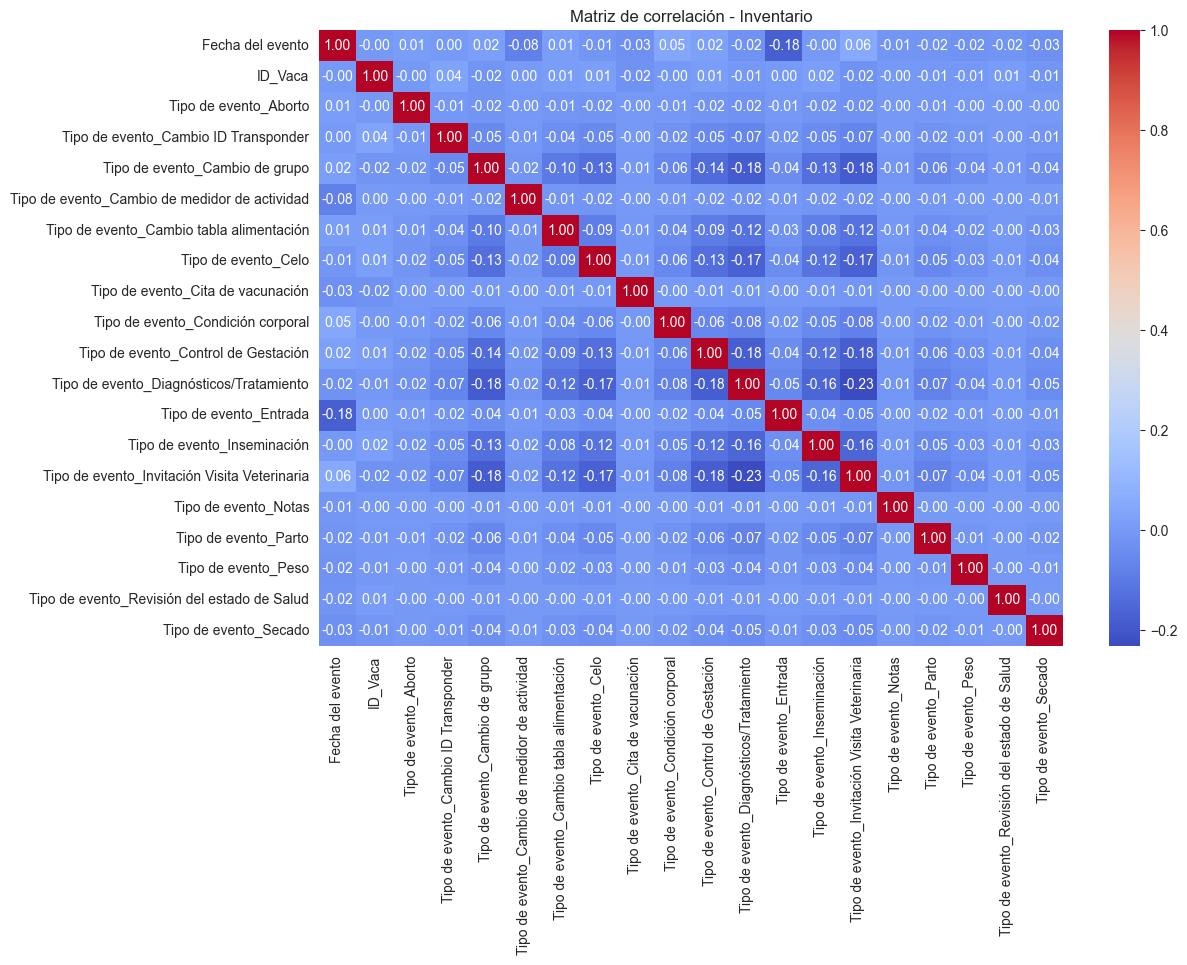

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación - Inventario")
plt.show()

In [ ]:
import pandas as pd
GESTATION_DAYS = 280
TARGET_DRY_DAYS = 55
TODAY = pd.Timestamp("2025-10-21")


def strip_accents(s: str) -> str:
    """Quita acentos para comparar textos de forma robusta."""
    if not isinstance(s, str):
        return s
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

def truthy(x):
    """Interpreta valores no vacíos como verdaderos: 1, True, 'x', 'si', cualquier texto no vacío."""
    if x is None:
        return False
    if isinstance(x, (int, float)) and not pd.isna(x):
        return x != 0
    if isinstance(x, str):
        xs = x.strip().lower()
        return xs not in ("", "0", "no", "false", "f", "nan", "none", "null")
    return bool(x)


In [ ]:
df.columns = [c.strip().lower() for c in df.columns]

print(df.shape)
df.head(10)

(3511, 20)


,fecha del evento,id_vaca,tipo de evento_aborto,tipo de evento_cambio id transponder,tipo de evento_cambio de grupo,tipo de evento_cambio de medidor de actividad,tipo de evento_cambio tabla alimentación,tipo de evento_celo,tipo de evento_cita de vacunación,tipo de evento_condición corporal,tipo de evento_control de gestación,tipo de evento_diagnósticos/tratamiento,tipo de evento_entrada,tipo de evento_inseminación,tipo de evento_invitación visita veterinaria,tipo de evento_notas,tipo de evento_parto,tipo de evento_peso,tipo de evento_revisión del estado de salud,tipo de evento_secado
0,2022-07-07,1213,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,2022-09-27,1213,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,2022-09-27,1213,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,2023-08-17,1213,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,2023-08-17,1213,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
5,2023-08-23,1213,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
6,2023-08-23,1213,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
7,2023-08-31,1213,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
8,2023-09-06,1213,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
9,2023-09-27,1213,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [ ]:
# 3) Detectar columnas clave y convertir fechas

# En tu archivo típico: 'fecha del evento' y 'id_vaca'
col_fecha = next((c for c in df.columns if "fecha" in c and "evento" in c), None)
col_id = next((c for c in df.columns if "id_vaca" in c or (("vaca" in c or "animal" in c or "arete" in c) and "id" in c)), None)

if col_fecha is None or col_id is None:
    raise ValueError(f"No encontré columnas clave. Fecha: {col_fecha}  ID: {col_id}. "
                     f"Revisa los nombres exactos en tu archivo.")

# Convierte a tipo fecha (día primero)
df[col_fecha] = pd.to_datetime(df[col_fecha], errors="coerce", dayfirst=True, infer_datetime_format=True)

# Todas las columnas que empiezan por "tipo de evento_"
event_cols = [c for c in df.columns if c.startswith("tipo de evento_")]
if not event_cols:
    raise ValueError("No encontré columnas 'tipo de evento_*'. Revisa tu archivo.")

print("Columna fecha:", col_fecha)
print("Columna ID vaca:", col_id)
print("N° columnas de eventos:", len(event_cols))
event_cols[:10]


Columna fecha: fecha del evento
Columna ID vaca: id_vaca
N° columnas de eventos: 18


C:\Users\fabon\AppData\Local\Temp\ipykernel_30560\2702264827.py:12: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[col_fecha] = pd.to_datetime(df[col_fecha], errors="coerce", dayfirst=True, infer_datetime_format=True)


['tipo de evento_aborto',
 'tipo de evento_cambio id transponder',
 'tipo de evento_cambio de grupo',
 'tipo de evento_cambio de medidor de actividad',
 'tipo de evento_cambio tabla alimentación',
 'tipo de evento_celo',
 'tipo de evento_cita de vacunación',
 'tipo de evento_condición corporal',
 'tipo de evento_control de gestación',
 'tipo de evento_diagnósticos/tratamiento']

In [ ]:
# 4) Pasar de ancho a largo (melt) y quedarnos con los eventos 'verdaderos'
import unicodedata
rows = []
for _, row in df.iterrows():
    fecha = row[col_fecha]
    vaca = row[col_id]
    if pd.isna(fecha) or pd.isna(vaca):
        continue
    for c in event_cols:
        val = row[c]
        if truthy(val):
            # nombre del evento = texto después de 'tipo de evento_'
            ev = c.replace("tipo de evento_", "").strip()
            rows.append((vaca, fecha, ev))

events = pd.DataFrame(rows, columns=["id_vaca", "fecha", "evento"])
events["evento_norm"] = events["evento"].map(lambda x: strip_accents(str(x)).lower().strip())

print(events.shape)
events.head(15)


(3511, 4)


,id_vaca,fecha,evento,evento_norm
0,1213,2022-07-07,entrada,entrada
1,1213,2022-09-27,peso,peso
2,1213,2022-09-27,diagnósticos/tratamiento,diagnosticos/tratamiento
3,1213,2023-08-17,diagnósticos/tratamiento,diagnosticos/tratamiento
4,1213,2023-08-17,invitación visita veterinaria,invitacion visita veterinaria
5,1213,2023-08-23,inseminación,inseminacion
6,1213,2023-08-23,celo,celo
7,1213,2023-08-31,invitación visita veterinaria,invitacion visita veterinaria
8,1213,2023-09-06,peso,peso
9,1213,2023-09-27,diagnósticos/tratamiento,diagnosticos/tratamiento


In [ ]:
# 5) Filtrar eventos clave

is_parto = events["evento_norm"].str.contains(r"\bparto\b", regex=True)
is_insem = events["evento_norm"].str.contains(r"insemin", regex=True)
is_aborto = events["evento_norm"].str.contains(r"aborto", regex=True)
is_ctrl_gest = events["evento_norm"].str.contains(r"control.*gest", regex=True)

ev_parto = events.loc[is_parto, ["id_vaca", "fecha"]].copy().rename(columns={"fecha": "fecha_parto"})
ev_insem = events.loc[is_insem, ["id_vaca", "fecha"]].copy().rename(columns={"fecha": "fecha_insem"})
ev_aborto = events.loc[is_aborto, ["id_vaca", "fecha"]].copy().rename(columns={"fecha": "fecha_aborto"})
ev_ctrl  = events.loc[is_ctrl_gest, ["id_vaca", "fecha"]].copy().rename(columns={"fecha": "fecha_ctrl_gest"})

print("Partos:", ev_parto.shape[0], " | Inseminaciones:", ev_insem.shape[0],
      " | Abortos:", ev_aborto.shape[0], " | Ctrl. gestación:", ev_ctrl.shape[0])


Partos: 80  | Inseminaciones: 344  | Abortos: 8  | Ctrl. gestación: 428


In [ ]:
# 6) Último parto por vaca
last_parto = ev_parto.sort_values("fecha_parto").groupby("id_vaca", as_index=False).tail(1)

# 6.1) Última inseminación por vaca, priorizando la más reciente DESPUÉS del último parto
if not ev_insem.empty:
    # Última IA (general)
    last_insem_all = ev_insem.sort_values("fecha_insem").groupby("id_vaca", as_index=False).tail(1)

    # Une IA con último parto para filtrar 'post-parto'
    merged = ev_insem.merge(last_parto, on="id_vaca", how="left")
    merged["ok_post_parto"] = (merged["fecha_parto"].notna()) & (merged["fecha_insem"] > merged["fecha_parto"])

    # Última IA post-parto por vaca
    post = (merged.loc[merged["ok_post_parto"]]
                  .sort_values("fecha_insem")
                  .groupby("id_vaca", as_index=False)
                  .tail(1))

    last_insem = last_insem_all.set_index("id_vaca")
    for vaca, row in post.set_index("id_vaca").iterrows():
        last_insem.loc[vaca] = row["fecha_insem"]
    last_insem = last_insem.reset_index()
else:
    last_insem = pd.DataFrame(columns=["id_vaca", "fecha_insem"])

last_parto.head(), last_insem.head()


(     id_vaca fecha_parto
 86      1216  2024-06-14
 987     2078  2024-06-17
 221     1226  2024-08-09
 2766    8703  2024-08-18
 287     1236  2024-08-27,
   id_vaca fecha_insem
 0    1497  2024-10-21
 1    1493  2024-11-07
 2    1510  2024-11-23
 3    8783  2025-01-02
 4    1517  2025-01-04)

In [ ]:
# 7) ¿Hubo aborto después de la última IA?
if not last_insem.empty and not ev_aborto.empty:
    ab = ev_aborto.merge(last_insem, on="id_vaca", how="inner")
    ab["aborto_post_insem"] = ab["fecha_aborto"] > ab["fecha_insem"]
    aborto_post = ab.groupby("id_vaca")["aborto_post_insem"].max().reset_index()
else:
    aborto_post = pd.DataFrame(columns=["id_vaca", "aborto_post_insem"])

aborto_post.head(10)


,id_vaca,aborto_post_insem
0,1225,False
1,1552,False
2,2078,False
3,5767,False
4,6131,False
5,6184,False
6,6248,False
7,8782,False


In [ ]:
import numpy as np

# 8) Base por vaca
vacas = pd.DataFrame({"id_vaca": pd.unique(events["id_vaca"])})

base = (vacas
        .merge(last_parto, on="id_vaca", how="left")
        .merge(last_insem, on="id_vaca", how="left")
        .merge(aborto_post, on="id_vaca", how="left")
       )

# 8.1) FPP: IA + 280 días, si NO hubo aborto posterior
base["FPP"] = pd.NaT
mask_gest = base["fecha_insem"].notna() & (~base["aborto_post_insem"].fillna(False))
base.loc[mask_gest, "FPP"] = base.loc[mask_gest, "fecha_insem"] + pd.to_timedelta(GESTATION_DAYS, unit="D")

# 8.2) Fecha de secado sugerida: FPP - TARGET_DRY_DAYS
base["fecha_secado_sugerida"] = pd.NaT
base.loc[base["FPP"].notna(), "fecha_secado_sugerida"] = base.loc[base["FPP"].notna(), "FPP"] - pd.to_timedelta(TARGET_DRY_DAYS, unit="D")

# 8.3) Días de gestación al HOY (aprox., desde IA)
base["dias_gestacion_hoy"] = np.where(
    base["fecha_insem"].notna(),
    (TODAY - base["fecha_insem"]).dt.days,
    np.nan
)

base.head(10)


C:\Users\fabon\AppData\Local\Temp\ipykernel_30560\3545216063.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mask_gest = base["fecha_insem"].notna() & (~base["aborto_post_insem"].fillna(False))


,id_vaca,fecha_parto,fecha_insem,aborto_post_insem,FPP,fecha_secado_sugerida,dias_gestacion_hoy
0,1213,2025-10-15,2025-01-19,NaN,2025-10-26,2025-09-01,275.0
1,1216,2024-06-14,2025-08-31,NaN,2026-06-07,2026-04-13,51.0
2,1225,2024-12-08,2025-08-03,False,2026-05-10,2026-03-16,79.0
3,1226,2024-08-09,2025-08-25,NaN,2026-06-01,2026-04-07,57.0
4,1236,2024-08-27,2025-08-16,NaN,2026-05-23,2026-03-29,66.0
5,1239,2024-09-04,2025-10-03,NaN,2026-07-10,2026-05-16,18.0
6,1493,2025-08-10,2024-11-07,NaN,2025-08-14,2025-06-20,348.0
7,1497,2025-07-18,2024-10-21,NaN,2025-07-28,2025-06-03,365.0
8,1510,2025-08-27,2024-11-23,NaN,2025-08-30,2025-07-06,332.0
9,1511,2025-10-08,2025-01-05,NaN,2025-10-12,2025-08-18,289.0


In [ ]:
# 9) Clasificar estado de cada vaca

def clasificar(row):
    fpp = row["FPP"]
    fsec = row["fecha_secado_sugerida"]
    fparto = row["fecha_parto"]
    insem = row["fecha_insem"]
    aborto = bool(row.get("aborto_post_insem", False))
    if pd.notna(fpp):
        if TODAY >= fpp:
            return "Parto esperado/pasado (verificar)"
        if pd.notna(fsec) and TODAY >= fsec:
            return "Pendiente de secado (gestante)"
        return "Gestante (en lactancia)"
    # sin FPP
    if aborto:
        return "Vacía (aborto post-IA)"
    if pd.isna(insem):
        if pd.notna(fparto):
            if (TODAY - fparto).days <= 60:
                return "Postparto reciente (sin IA)"
            return "Lactancia (sin IA registrada)"
        return "Sin datos claros"
    # tiene IA pero sin confirmación
    return "IA sin confirmación"

base["estado"] = base.apply(clasificar, axis=1)

# Días desde parto (si hay fecha de parto)
if "fecha_parto" in base.columns:
    base["dias_desde_parto"] = np.where(
        base["fecha_parto"].notna(),
        (TODAY - base["fecha_parto"]).dt.days,
        np.nan
    )

base.head(15)


,id_vaca,fecha_parto,fecha_insem,aborto_post_insem,FPP,fecha_secado_sugerida,dias_gestacion_hoy,estado,dias_desde_parto
0,1213,2025-10-15,2025-01-19,NaN,2025-10-26,2025-09-01,275.0,Pendiente de secado (gestante),6.0
1,1216,2024-06-14,2025-08-31,NaN,2026-06-07,2026-04-13,51.0,Gestante (en lactancia),494.0
2,1225,2024-12-08,2025-08-03,False,2026-05-10,2026-03-16,79.0,Gestante (en lactancia),317.0
3,1226,2024-08-09,2025-08-25,NaN,2026-06-01,2026-04-07,57.0,Gestante (en lactancia),438.0
4,1236,2024-08-27,2025-08-16,NaN,2026-05-23,2026-03-29,66.0,Gestante (en lactancia),420.0
5,1239,2024-09-04,2025-10-03,NaN,2026-07-10,2026-05-16,18.0,Gestante (en lactancia),412.0
6,1493,2025-08-10,2024-11-07,NaN,2025-08-14,2025-06-20,348.0,Parto esperado/pasado (verificar),72.0
7,1497,2025-07-18,2024-10-21,NaN,2025-07-28,2025-06-03,365.0,Parto esperado/pasado (verificar),95.0
8,1510,2025-08-27,2024-11-23,NaN,2025-08-30,2025-07-06,332.0,Parto esperado/pasado (verificar),55.0
9,1511,2025-10-08,2025-01-05,NaN,2025-10-12,2025-08-18,289.0,Parto esperado/pasado (verificar),13.0


In [ ]:
# 10) Ordenar por proximidad de secado y seleccionar columnas clave

base_sorted = base.sort_values(by=["fecha_secado_sugerida", "FPP", "fecha_parto"], ascending=[True, True, False])

cols_out = [
    "id_vaca",
    "fecha_parto",
    "fecha_insem",
    "FPP",
    "fecha_secado_sugerida",
    "dias_gestacion_hoy",
    "aborto_post_insem",
    "estado"
]

if "dias_desde_parto" in base_sorted.columns:
    cols_out.append("dias_desde_parto")

reporte = base_sorted[cols_out]

# Vista rápida
reporte.head(30)


,id_vaca,fecha_parto,fecha_insem,FPP,fecha_secado_sugerida,dias_gestacion_hoy,aborto_post_insem,estado,dias_desde_parto
7,1497,2025-07-18,2024-10-21,2025-07-28,2025-06-03,365.0,NaN,Parto esperado/pasado (verificar),95.0
6,1493,2025-08-10,2024-11-07,2025-08-14,2025-06-20,348.0,NaN,Parto esperado/pasado (verificar),72.0
8,1510,2025-08-27,2024-11-23,2025-08-30,2025-07-06,332.0,NaN,Parto esperado/pasado (verificar),55.0
43,8783,2025-10-08,2025-01-02,2025-10-09,2025-08-15,292.0,NaN,Parto esperado/pasado (verificar),13.0
11,1517,2025-10-07,2025-01-04,2025-10-11,2025-08-17,290.0,NaN,Parto esperado/pasado (verificar),14.0
9,1511,2025-10-08,2025-01-05,2025-10-12,2025-08-18,289.0,NaN,Parto esperado/pasado (verificar),13.0
10,1514,2025-10-11,2025-01-09,2025-10-16,2025-08-22,285.0,NaN,Parto esperado/pasado (verificar),10.0
0,1213,2025-10-15,2025-01-19,2025-10-26,2025-09-01,275.0,NaN,Pendiente de secado (gestante),6.0
18,2119,2024-11-09,2025-03-21,2025-12-26,2025-11-01,214.0,NaN,Gestante (en lactancia),346.0
32,8715,2025-01-26,2025-03-31,2026-01-05,2025-11-11,204.0,NaN,Gestante (en lactancia),268.0
